<center> <h1> NETWORKING NETWORK INTRUSION DETECTION - CASE STUDY

___

## BUSINESS CONTEXT

- With the enormous growth of computer networks usage and the huge increase in the number of applications running on top of it, network security is becoming increasingly more important. All the computer systems suffer from security vulnerabilities which are both technically difficult and economically costly to be solved by the manufacturers. Therefore, the role of Intrusion Detection Systems (IDSs), as special-purpose devices to detect anomalies and attacks in the network, is becoming more important. <BR>
<br>
    
- The research in the intrusion detection field has been mostly focused on a nomaly-based and misusebased detection techniques for a long time. While misuse-based detection is generally favored in commercial products due to its predictability and high accuracy, in academic research anomaly detection is typically conceived as a more powerful method due to its theoretical potential for addressing novel attacks.<BR>
<br>
    
- Conducting a thorough analysis of the recent research trend in anomaly detection, one will encounter several machine learning methods reported to have a very high detection rate of 98% while keeping the false alarm rate at 1%. However, when we look at the state of the art IDS solutions and commercial tools, there is no evidence of using anomaly detection approaches, and practitioners still think that it is an immature technology. To find the reason of this contrast, lots of research was done done in anomaly detection and considered various aspects such as learning and detection approaches, training data sets, testing data sets, and evaluation methods.

___

## BUSINESS PROBLEM:

<large> 
The task to build network intrusion detection system to detect anamolies and attacks in the network. There are two problems: 
1. **Binomial Classification:**  Activity is normal or attack
2. **Multinomial classification:**  Activity is normal or DOS or PROBE or R2L or U2R

___

#### IMPORTING REQUIRED LIBRARIES

In [382]:
import pandas as pd             # Pandas provide high level data structure and wide variety of tools for data analysis
import numpy as np              # NumPy is the fundamental package for scientific computing with Python.

import seaborn as sns           # Seaborn provides visualisation capabilities with several kind of plots

import matplotlib.pyplot as plt # Matplotlib provides various kind of graphs and plots for data visualisation
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False

import warnings             # Warnings filter controls whether warnings are ignored, displayed, or turned into errors
warnings.filterwarnings('ignore')

#### IMPORTING THE DATASET

In [383]:
columns_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
                 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 
                 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack','last_flag']

train_df = pd.read_csv('Train.txt', sep = ',', header = None, names = columns_names)  # Training dataset

test_df = pd.read_csv('Test.txt', sep = ',', header = None, names = columns_names)  # Testing dataset

___

## DATA AUDIT

In [384]:
train_df.head()  # Returns the first five rows of the train_df DataFrame.

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [385]:
train_df.tail()  # Returns the last five rows of the test_df DataFrame.

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [386]:
train_df.shape  # Returns the dimensionality of the train_df DataFrame.

(125973, 43)

In [387]:
train_df.columns  # Returns the columns present in the train_df DataFrame.

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [388]:
train_df.info(null_counts = False)  # Prints a concise summary of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       int64
protocol_type                  object
service                        object
flag                           object
src_bytes                      int64
dst_bytes                      int64
land                           int64
wrong_fragment                 int64
urgent                         int64
hot                            int64
num_failed_logins              int64
logged_in                      int64
num_compromised                int64
root_shell                     int64
su_attempted                   int64
num_root                       int64
num_file_creations             int64
num_shells                     int64
num_access_files               int64
num_outbound_cmds              int64
is_host_login                  int64
is_guest_login                 int64
count                          int64
srv_count                      int6

In [389]:
train_df.isna().sum()  # Detects number of missing values in the train_df DataFrame.

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [390]:
# Splitting continous and categorical valriables to perform some specific functions on them.
# and so to have better clarity of the data

train_df_conti_vars = train_df.loc[:, (train_df.dtypes == 'float64') | (train_df.dtypes == 'int64') | (train_df.dtypes == 'float32') | (train_df.dtypes == 'int32')]
train_df_cat_vars = train_df.loc[:, train_df.dtypes == 'object']

In [391]:
train_df_conti_vars.head()  # Returns the first five rows of the 'train_df_conti_vars' DataFrame.

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


In [392]:
train_df_cat_vars.head()  # Returns the first five rows of the 'train_df_cat_vars' DataFrame.

,protocol_type,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal


In [393]:
# Creating a UDF to get the summary of the continous variables for better understanding

def continous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.min(), x.mean(), x.median(), x.std(), x.var(), 
                      x.quantile(.01), x.quantile(.05), x.quantile(.10), x.quantile(.25), x.quantile(.50), 
                      x.quantile(.75), x.quantile(.90), x.quantile(.95), x.quantile(.99), x.max()], 
                      index = ['N', 'NMISS', 'SUM', 'MIN', 'MEAN', 'MEDIAN', 'STD', 'VAR', 'P1', 'P5', 'P10', 
                               'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'])

In [394]:
train_df_conti_vars.apply(continous_var_summary).T.round()  # prints a brief summary of the continous variables

,N,NMISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,0.0,287.0,0.0,2605.0,6.783500e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,9591.0,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,0.0,45567.0,44.0,5870331.0,3.446079e+13,0.0,0.0,0.0,0.0,44.0,276.0,848.0,1480.0,54540.0,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,0.0,19779.0,0.0,4021269.0,1.617061e+13,0.0,0.0,0.0,0.0,0.0,516.0,3376.0,8314.0,25519.0,1.309937e+09
land,125973.0,0.0,2.500000e+01,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00
wrong_fragment,125973.0,0.0,2.858000e+03,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.0,0.0,0.0,2.0,5.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000e+00
logged_in,125973.0,0.0,4.985200e+04,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.0,0.0,0.0,24.0,5.730000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.479000e+03


In [395]:
# Creating a UDF for the summary of categorical varibles for better understanding of the data

def categorical_var_summary(x):
    Mode = x.value_counts().reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1],
                      round(((Mode.iloc[0, 1] * 100) / x.count()), 2)], 
                     index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERC'])

In [396]:
train_df_cat_vars.apply(categorical_var_summary).T  # prints a brief summary of the categorical variables

,N,NMISS,MODE,FREQ,PERC
protocol_type,125973,0,tcp,102689,81.52
service,125973,0,http,40338,32.02
flag,125973,0,SF,74945,59.49
attack,125973,0,normal,67343,53.46


In [397]:
train_df_cat_vars.protocol_type.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [398]:
train_df_cat_vars.service.unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [399]:
train_df_cat_vars.flag.unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [400]:
train_df_cat_vars.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

___

## DATA PREPERATION

### OUTLIERS TREATMENT

In [401]:
# Clipping Outliers with P3 and P97

train_df_conti_vars = train_df_conti_vars.apply(lambda x: x.clip(lower = x.dropna().quantile(.02), upper = x.quantile(.98)))


In [402]:
train_df_conti_vars.apply(continous_var_summary).T.round()  # prints a brief summary of the continous variables

,N,NMISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,5887114.0,0.0,47.0,0.0,297.0,87978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2051.0,2051.0
src_bytes,125973.0,0.0,53497792.0,0.0,425.0,44.0,1352.0,1827123.0,0.0,0.0,0.0,0.0,44.0,276.0,848.0,1480.0,8737.0,8737.0
dst_bytes,125973.0,0.0,150769876.0,0.0,1197.0,0.0,3011.0,9066272.0,0.0,0.0,0.0,0.0,0.0,516.0,3376.0,8314.0,15341.0,15341.0
land,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wrong_fragment,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
urgent,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hot,125973.0,0.0,2671.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
num_failed_logins,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
logged_in,125973.0,0.0,49852.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
num_compromised,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### DEFINING TARGET VARIABLE

In [403]:
train_df_cat_vars.attack.unique()  # Returns unique values of 'attack' variable of the 'train_df_cat_vars' DataFrame.

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [404]:
# The dependent variable (target variable) is not definied explicitly. 
# So, I used attack variable to define the target variable as required.

w = np.where
n = train_df_cat_vars['attack']

train_df_cat_vars['activity'] = w((n.isin(['neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop', 
                                           'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd', 'ftp_write', 
                                           'multihop', 'rootkit', 'buffer_overflow', 'imap', 'warezmaster', 'phf', 
                                           'land', 'loadmodule', 'spy', 'perl']) == True), 1, 0)

In [405]:
# Prints the frequency of 'normal' vs 'attack'

train_df_cat_vars['activity'].value_counts()

0    67343
1    58630
Name: activity, dtype: int64

### DATA VISUALIZATION

#### UNIVARIATE ANALYSIS

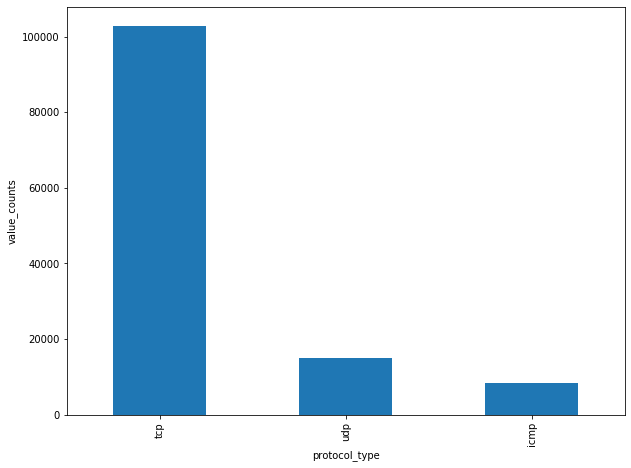

In [406]:
# The below bargraph shows the Protocol used in the connection

train_df_cat_vars['protocol_type'].value_counts().plot.bar()
plt.xlabel('protocol_type')
plt.ylabel('value_counts')
plt.show()

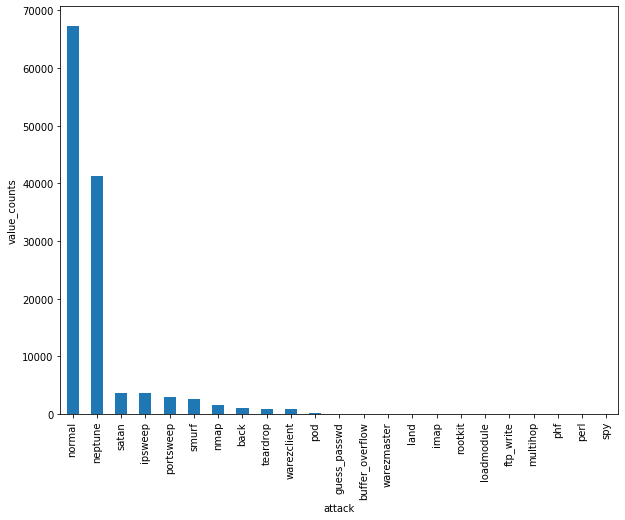

In [407]:
# The below bargraph shows the Types of attacks

train_df_cat_vars['attack'].value_counts().plot.bar()
plt.xlabel('attack')
plt.ylabel('value_counts')
plt.show()

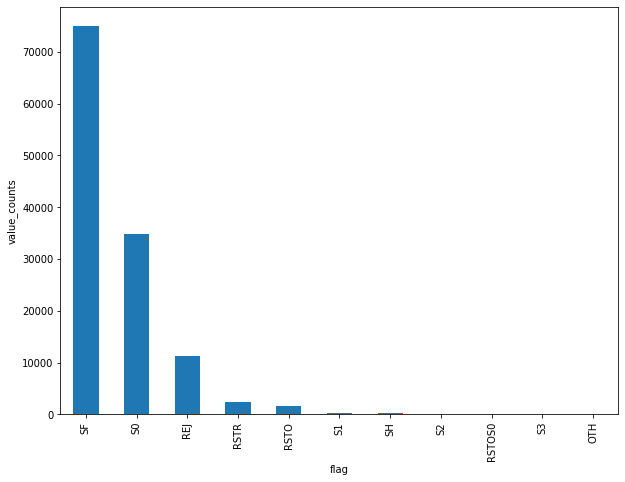

In [408]:
# The below bar graph shows the Status of the connection – Normal or Error

train_df_cat_vars['flag'].value_counts().plot.bar()
plt.xlabel('flag')
plt.ylabel('value_counts')
plt.show()

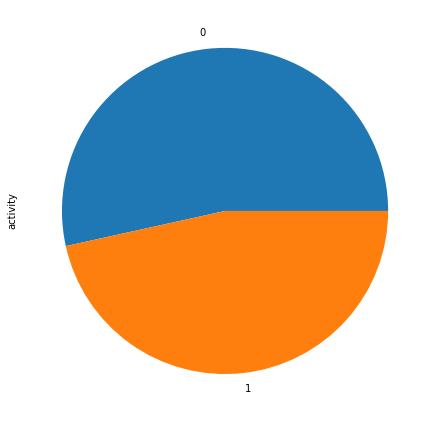

In [409]:
# The below pichart shows percentage of the Activity is normal or attack

train_df_cat_vars['activity'].value_counts().plot.pie()

#### BIVARIATE ANALYSIS

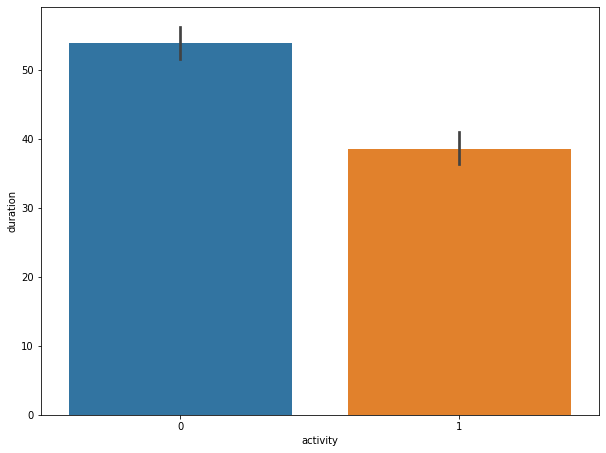

In [410]:
# The below bargraph shows the relationship between the 'attack or normal activity' and 'Length of time duration of the connection'

sns.barplot(x = train_df_cat_vars.activity, y = train_df_conti_vars.duration)

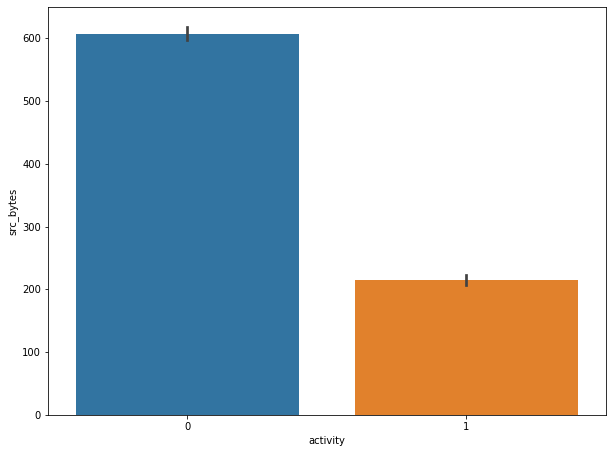

In [411]:
# The below bargraph shows the relationship between the 'attack or normal activity' and 'Number of data bytes transferred from source to destination in single connection'

sns.barplot(x = train_df_cat_vars.activity, y = train_df_conti_vars.src_bytes)

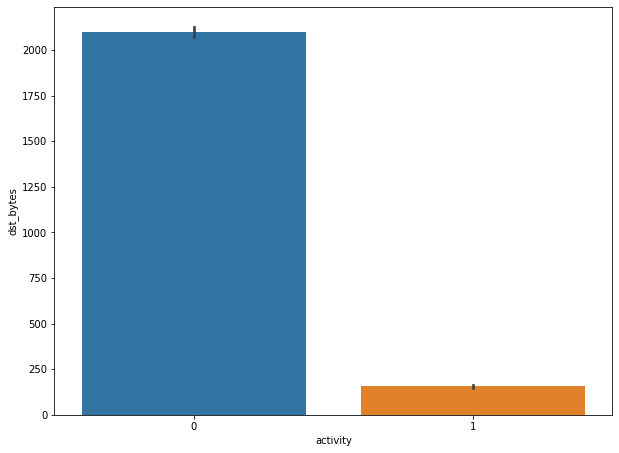

In [412]:
# The below bargraph shows the relationship between the 'attack or normal activity' and 'Number of data bytes transferred from destination to source in single connection'

sns.barplot(x = train_df_cat_vars.activity, y = train_df_conti_vars.dst_bytes)

#### MULTIVARIATE ANALYSIS

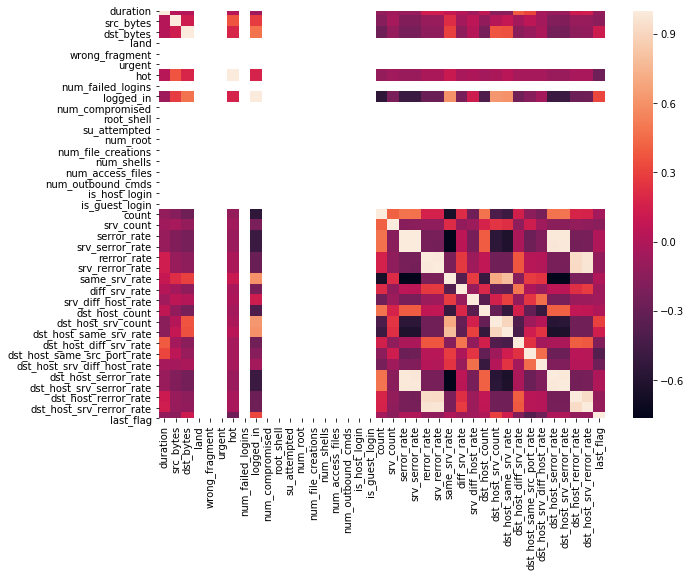

In [413]:
sns.heatmap(train_df_conti_vars.corr())  # Shows the correlation among all continous variables

### CREATING DUMMY VARIABLES

In [414]:
# Creating a UDF to convert categorical varibles to dummy variables for model building

def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [415]:
# Creating dummy variables

for c_feature in ['protocol_type', 'flag']:
    train_df_cat_vars[c_feature] = train_df_cat_vars[c_feature].astype('category')
    train_df_cat_vars = create_dummies(train_df_cat_vars, c_feature)

In [416]:
train_df_cat_vars.head()  # New dataset with dummy variables

,service,attack,activity,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,ftp_data,normal,0,1,0,0,0,0,0,0,0,0,0,1,0
1,other,normal,0,0,1,0,0,0,0,0,0,0,0,1,0
2,private,neptune,1,1,0,0,0,0,0,1,0,0,0,0,0
3,http,normal,0,1,0,0,0,0,0,0,0,0,0,1,0
4,http,normal,0,1,0,0,0,0,0,0,0,0,0,1,0


In [417]:
train_df_cat_vars = train_df_cat_vars[train_df_cat_vars.columns.difference(['service', 'attack'])]

In [418]:
train_df_cat_vars.head()

,activity,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp
0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,1,0


___

## ONE FINAL CONSOLIDATED TABLE

In [419]:
# Getting one consolidated dataset
train_final = pd.concat([train_df_conti_vars, train_df_cat_vars], axis = 1)

In [420]:
train_final.head()  # One final consolidated table

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp
0,0.0,491,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.0,146,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.0,232,8153.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0.0,199,420.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [421]:
df1 = train_final.copy()  # Duplicating the training dataset to a new DataFrame for Binomial Classification.

In [422]:
df1.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp
0,0.0,491,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.0,146,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.0,232,8153.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0.0,199,420.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


___

## ASSUMPTIONS CHECK

### ASSUMPTION OF APPROPRIATE OUTCOME STRUCTURE

- To begin, one of the main assumptions of logistic regression is the appropriate structure of the outcome
variable.

In [423]:
df1.activity.unique()

array([0, 1])

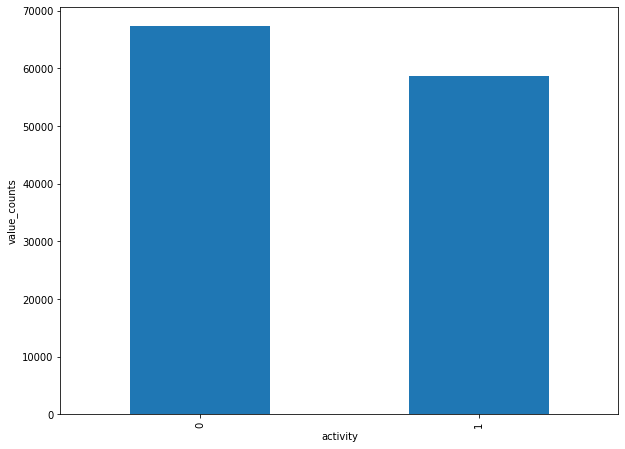

In [424]:
# The below bargraph shows the Activity is normal or attack

train_df_cat_vars['activity'].value_counts().plot.bar()
plt.xlabel('activity')
plt.ylabel('value_counts')
plt.show()

* Hence, the dependent variable is binary.

### ASSUMPTION OF OBSERVATION INDEPENDENCE

- Logistic regression requires the observations to be independent of each other. In other words, the
observations should not come from repeated measurements or matched data

In [425]:
for i in df1:
    print("Number of non-zeroes in", i, ':', (np.count_nonzero(df1[i])))

Number of non-zeroes in duration : 10018
Number of non-zeroes in src_bytes : 76581
Number of non-zeroes in dst_bytes : 58006
Number of non-zeroes in land : 0
Number of non-zeroes in wrong_fragment : 0
Number of non-zeroes in urgent : 0
Number of non-zeroes in hot : 2671
Number of non-zeroes in num_failed_logins : 0
Number of non-zeroes in logged_in : 49852
Number of non-zeroes in num_compromised : 0
Number of non-zeroes in root_shell : 0
Number of non-zeroes in su_attempted : 0
Number of non-zeroes in num_root : 0
Number of non-zeroes in num_file_creations : 0
Number of non-zeroes in num_shells : 0
Number of non-zeroes in num_access_files : 0
Number of non-zeroes in num_outbound_cmds : 0
Number of non-zeroes in is_host_login : 0
Number of non-zeroes in is_guest_login : 0
Number of non-zeroes in count : 125973
Number of non-zeroes in srv_count : 125973
Number of non-zeroes in serror_rate : 39144
Number of non-zeroes in srv_serror_rate : 37219
Number of non-zeroes in rerror_rate : 16190


In [426]:
# Deleting variables having mostly zeros

delete_cols = ['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'num_compromised', 'root_shell', 
               'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds'
               , 'is_host_login', 'is_guest_login', 'flag_RSTOS0', 'flag_S2', 'flag_S3', 'flag_SH']

df1 = df1.drop(columns = delete_cols)

In [427]:
df1.shape

(125973, 34)

In [428]:
df1.head()

,duration,src_bytes,dst_bytes,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,...,last_flag,activity,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_SF,protocol_type_tcp,protocol_type_udp
0,0.0,491,0.0,0,0,2,2,0.0,0.0,0.0,...,20,0,0,0,0,0,0,1,1,0
1,0.0,146,0.0,0,0,13,1,0.0,0.0,0.0,...,15,0,0,0,0,0,0,1,0,1
2,0.0,0,0.0,0,0,123,6,1.0,1.0,0.0,...,19,1,0,0,0,1,0,0,1,0
3,0.0,232,8153.0,0,1,5,5,0.2,0.2,0.0,...,21,0,0,0,0,0,0,1,1,0
4,0.0,199,420.0,0,1,30,32,0.0,0.0,0.0,...,21,0,0,0,0,0,0,1,1,0


### ASSUMPTION OF THE ABSENCE OF MULTICOLLINEARITY

Logistic regression requires there to be little or no multicollinearity among the independent variables. This
means that the independent variables should not be too highly correlated with each other

In [429]:
corrm = df1.corr()
corrm

,duration,src_bytes,dst_bytes,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,...,last_flag,activity,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_SF,protocol_type_tcp,protocol_type_udp
duration,1.000000,0.014506,0.019357,0.028605,-0.075214,-0.115326,-0.065791,-0.099538,-0.099083,0.135396,...,-0.113685,-0.025842,-0.049276,-0.005655,0.423882,-0.097440,-0.008493,0.001041,-0.111867,0.166124
src_bytes,0.014506,1.000000,0.125139,0.365609,0.278202,-0.170852,-0.036202,-0.189077,-0.189070,-0.098572,...,-0.141914,-0.144802,-0.098303,-0.028825,-0.000488,-0.194288,0.052142,0.234207,0.090665,-0.096339
dst_bytes,0.019357,0.125139,1.000000,0.186173,0.475999,-0.271817,-0.103908,-0.231156,-0.231094,-0.132713,...,0.118855,-0.322238,-0.124370,-0.037792,-0.021564,-0.245822,0.125067,0.296707,0.182061,-0.137452
hot,0.028605,0.365609,0.186173,1.000000,0.171729,-0.106439,-0.058538,-0.083606,-0.083829,-0.026359,...,-0.262505,0.018987,-0.046051,0.013883,0.025955,-0.090160,0.009494,0.091364,0.070084,-0.054097
logged_in,-0.075214,0.278202,0.475999,0.171729,1.000000,-0.551210,-0.217280,-0.491925,-0.490167,-0.287514,...,0.320065,-0.690171,-0.253209,-0.070580,-0.093418,-0.500442,0.052719,0.641738,0.385350,-0.297448
count,-0.115326,-0.170852,-0.271817,-0.106439,-0.551210,1.000000,0.410774,0.479838,0.474677,0.159981,...,-0.052463,0.586660,0.196762,0.068204,-0.084694,0.484381,-0.039222,-0.537940,-0.038874,-0.005662
srv_count,-0.065791,-0.036202,-0.103908,-0.058538,-0.217280,0.410774,1.000000,-0.159253,-0.158425,-0.128059,...,-0.154473,-0.049483,-0.104182,-0.032987,-0.058326,-0.153183,-0.020569,0.229816,-0.577764,0.455375
serror_rate,-0.099538,-0.189077,-0.231156,-0.083606,-0.491925,0.479838,-0.159253,1.000000,0.993289,-0.227536,...,-0.004594,0.650652,-0.189105,-0.071002,-0.089166,0.979174,0.058044,-0.758419,0.300058,-0.230312
srv_serror_rate,-0.099083,-0.189070,-0.231094,-0.083829,-0.490167,0.474677,-0.158425,0.993289,1.000000,-0.227814,...,0.000005,0.648289,-0.196510,-0.070592,-0.088459,0.982660,0.052419,-0.755827,0.300909,-0.232268
rerror_rate,0.135396,-0.098572,-0.132713,-0.026359,-0.287514,0.159981,-0.128059,-0.227536,-0.227814,1.000000,...,-0.118802,0.253397,0.835068,0.299639,0.369812,-0.224772,-0.019300,-0.447630,0.177926,-0.137304


In [430]:
# the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
# first element of sol series is the pair with the bigest correlation

sol = corrm.where(np.triu(np.ones(corrm.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).reset_index()
sol.loc[(sol[0] > 0.50) | (sol[0] < -0.50)]['level_0'].drop_duplicates()

0                   serror_rate
1                   rerror_rate
2               srv_serror_rate
3          dst_host_serror_rate
5      dst_host_srv_serror_rate
11              srv_rerror_rate
14         dst_host_rerror_rate
16           dst_host_srv_count
19     dst_host_srv_rerror_rate
20                same_srv_rate
23       dst_host_same_srv_rate
29                     activity
31                    logged_in
35                        count
528              dst_host_count
538                   srv_count
550                     flag_S0
560           protocol_type_tcp
Name: level_0, dtype: object

In [431]:
# Another method to find correlation

sol = corrm.unstack().sort_values().drop_duplicates().reset_index()
sol.loc[(sol[0] > 0.50) | (sol[0] < -0.50)]['level_0'].unique()

array(['protocol_type_tcp', 'same_srv_rate', 'dst_host_serror_rate',
       'serror_rate', 'flag_SF', 'srv_serror_rate', 'activity',
       'dst_host_srv_serror_rate', 'dst_host_srv_count', 'logged_in',
       'dst_host_same_srv_rate', 'srv_count', 'count', 'dst_host_count',
       'dst_host_srv_diff_host_rate', 'flag_REJ',
       'dst_host_srv_rerror_rate', 'srv_rerror_rate',
       'dst_host_rerror_rate', 'rerror_rate', 'flag_S0', 'duration'],
      dtype=object)

In [432]:
# Dropping variables based on multicollinearity among the independent variables

X_corr_vars = ['protocol_type_tcp', 'same_srv_rate', 'dst_host_serror_rate',
               'serror_rate', 'flag_SF', 'srv_serror_rate',
               'dst_host_srv_serror_rate', 'dst_host_srv_count', 'logged_in',
               'dst_host_same_srv_rate', 'srv_count', 'count', 'dst_host_count',
               'dst_host_srv_diff_host_rate', 'flag_REJ',
               'dst_host_srv_rerror_rate', 'srv_rerror_rate',
               'dst_host_rerror_rate', 'rerror_rate', 'flag_S0', 'duration']

df1 = df1.drop(columns = X_corr_vars)

In [433]:
df1.shape

(125973, 13)

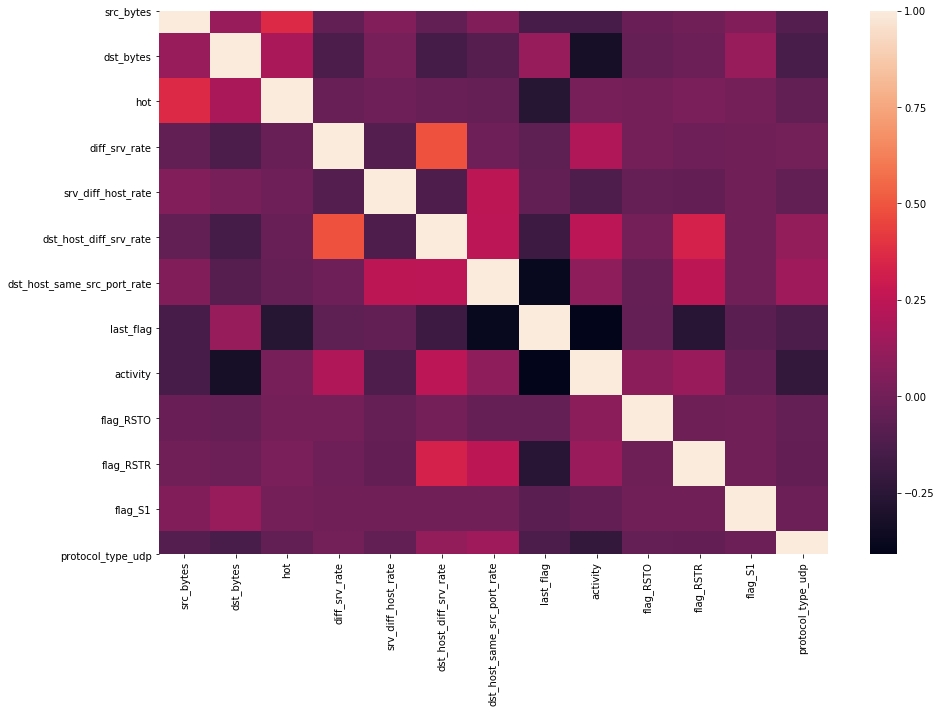

In [434]:
plt.figure(figsize = (15, 10))
sns.heatmap(df1.corr())

___

# BINOMIAL CLASSIFICATION

## MODEL BUILDING

### LOGISTIC REGRESSION TECHNIQUE

In [435]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split  

train, test = train_test_split(df1, test_size = 0.3, random_state = 42)

In [436]:
# checking the shape of training and testing data to make sure about the division
# hence training data has 70% of the observations whereas testing has 30%

print('Shape of training dataset', train.shape)
print('\nShape of testing dataset', test.shape)

Shape of training dataset (88181, 13)

Shape of testing dataset (37792, 13)


In [437]:
df1.columns

Index(['src_bytes', 'dst_bytes', 'hot', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'last_flag',
       'activity', 'flag_RSTO', 'flag_RSTR', 'flag_S1', 'protocol_type_udp'],
      dtype='object')

In [438]:
# Feature selection

feature_cols = df1.columns.difference( ['activity'] )

In [439]:
feature_cols

Index(['diff_srv_rate', 'dst_bytes', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'flag_RSTO', 'flag_RSTR', 'flag_S1',
       'hot', 'last_flag', 'protocol_type_udp', 'src_bytes',
       'srv_diff_host_rate'],
      dtype='object')

In [440]:
my_formula = "activity ~" + "+".join(feature_cols)

In [441]:
# importing the required libraries for model building
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression

lm = sm.logit(formula = my_formula, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.361695
         Iterations 9


In [442]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               activity   No. Observations:                88181
Model:                          Logit   Df Residuals:                    88168
Method:                           MLE   Df Model:                           12
Date:                Fri, 14 Feb 2020   Pseudo R-squ.:                  0.4762
Time:                        15:31:51   Log-Likelihood:                -31895.
converged:                       True   LL-Null:                       -60894.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      20.3035      0.179    113.267      0.000      19.952      20.655
diff_srv_rate                   0.6719      0.085      7.895      0.000       0.505       0.839
dst_bytes                      -0.0009   1.51e-05    -60.718      0.000      -0.001      -0.001
dst_host_diff_srv_rate          5.5746      0.116     48.198      0.000       5.348       5.801
dst_host_same_src_port_rate    -0.9160      0.043    -21.254      0.000      -1.000      -0.831
flag_RSTO                       0.7293      0.098      7.428      0.000       0.537       0.922
flag_RSTR                       1.4434      0.298      4.841      0.000       0.859       2.028
flag_S1                       -11.4096      0.643    -17.757      0.000     -12.669     -10.150
hot                             2.6910      0.104     25.781      0.000       2.486       2.896
last_flag                      -0.9831      0.009   -112.695      0.000      -1.000      -0.966
protocol_type_udp              -4.5224      0.045    -99.402      0.000      -4.612      -4.433
src_bytes                      -0.0005   1.15e-05    -43.204      0.000      -0.001      -0.000
srv_diff_host_rate             -2.0142      0.052    -38.936      0.000      -2.116      -1.913
===============================================================================================
"""

In [443]:
# importing required libraries and funciton for variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [444]:
a, b = dmatrices(my_formula, train ,return_type = 'dataframe')

vif = pd.DataFrame()

vif['features'] = b.columns

vif['VIF score'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]

In [445]:
vif.sort_values(['VIF score'], ascending = False)

,features,VIF score
0,Intercept,143.779801
3,dst_host_diff_srv_rate,1.679268
1,diff_srv_rate,1.419608
9,last_flag,1.406708
4,dst_host_same_src_port_rate,1.400781
8,hot,1.307911
6,flag_RSTR,1.278232
11,src_bytes,1.190047
2,dst_bytes,1.126979
12,srv_diff_host_rate,1.122694


- Higher the vif score, more insignificant the variable is.
- Statistically, vif score should be less than 2.
- Hence, in this case I can consider all the varibles above significant

## predicting Values

In [446]:
train['pred_prob'] = lm.predict(train)
train.head()

,src_bytes,dst_bytes,hot,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,last_flag,activity,flag_RSTO,flag_RSTR,flag_S1,protocol_type_udp,pred_prob
49911,0,0.0,0,0.00,1.0,0.00,0.33,21,0,0,0,0,0,0.065487
46670,0,0.0,0,0.15,0.0,0.08,0.00,21,1,0,0,0,0,0.551091
100564,230,3864.0,0,0.00,0.0,0.00,0.04,21,0,0,0,0,0,0.017524
51601,567,0.0,0,0.00,0.0,0.06,0.01,21,0,0,0,0,0,0.425869
123170,1603,8195.0,0,0.00,0.0,0.01,0.01,19,0,0,1,0,0,0.005607


In [447]:
test['pred_prob'] = lm.predict(test)
test.head()

,src_bytes,dst_bytes,hot,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,last_flag,activity,flag_RSTO,flag_RSTR,flag_S1,protocol_type_udp,pred_prob
378,36,0.0,0,0.00,0.75,0.00,1.00,21,0,0,0,0,1,0.000669
32038,0,0.0,0,0.10,0.00,0.05,0.01,18,1,0,0,0,0,0.949998
86399,0,0.0,0,0.06,0.00,0.06,0.00,21,1,0,0,0,0,0.508278
74412,0,0.0,0,0.06,0.00,0.07,0.00,19,1,0,0,0,0,0.886458
52951,0,0.0,0,0.00,0.00,0.64,0.64,15,1,0,1,0,0,0.999954


### CHECK MODEL ACCURACY

In [448]:
from sklearn.metrics import roc_auc_score, accuracy_score

print('roc_auc_score of training dataset:', roc_auc_score(train['activity'], train['pred_prob']))
print('roc_auc_score of testing dataset:', roc_auc_score(test['activity'], test['pred_prob']))

roc_auc_score of training dataset: 0.9328800142172935
roc_auc_score of testing dataset: 0.9310770081675306


- ROC AUC SCORE is coming out to be good in training and testing dataset. Hence, we can consider our model good.

In [449]:
print("Response rate (Proportion of 1 vs 0):", train['activity'].mean())
print("Average of predicted probalities:", train['pred_prob'].mean())

Response rate (Proportion of 1 vs 0): 0.46405688300200726
Average of predicted probalities: 0.46405688300203796


#### GET THE SOMER'S D VALUES FOR ALL THE X VARIABLES

In [450]:
# empty dataframe
somersd_df = pd.DataFrame()

# iterate for each of the X - dependant variables and get the Somer's D value
for num_variable in df1.columns.difference(['activity']):
    
    # execute teh logit model
    logreg = sm.logit(formula = str('activity ~ ') + str(num_variable), data = df1).fit()
    
    # get the predicted probabilities and create a dataframe with the predicted values
    y_score = pd.DataFrame(logreg.predict())
    
    # name the column of the df as score
    y_score.columns = ['Score']
    
    # calculate the Somer's D values
    somers_d = 2 * metrics.roc_auc_score(df1['activity'], y_score) - 1
    
    # place the variable name and the Somers' D score in a temp dataframe
    temp = pd.DataFrame([num_variable, somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    
    # append the data in the dataframe for all the X variables
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.666611
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592330
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.656466
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.686483
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686488
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.680423
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.689106
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.690574
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.592870
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.664989
  

In [451]:
# print the Somer's D values for all variables
# Bi-variate analysis to check the predictive power of each independent against dependent

somersd_df.sort_values(by = 'SomersD', ascending = False)

,Variable Name,SomersD
0,dst_bytes,0.799051
0,src_bytes,0.797568
0,diff_srv_rate,0.689472
0,dst_host_diff_srv_rate,0.653346
0,last_flag,0.525771
0,srv_diff_host_rate,0.273188
0,protocol_type_udp,0.14099
0,flag_RSTR,0.0366347
0,flag_RSTO,0.0196544
0,hot,0.00548361


### FOR CUT-OFF

### DECILE ANALYSIS

### TRAINING DATASET

In [452]:
train['deciles'] = pd.qcut(train.pred_prob, 10, labels = False)

In [453]:
min_prob = train.groupby(train.deciles)['deciles', 'pred_prob'].min().round(2).sort_index(ascending=False)['pred_prob']
max_prob = train.groupby(train.deciles)['deciles', 'pred_prob'].max().round(2).sort_index(ascending=False)['pred_prob']
total_count = train.groupby(train.deciles)['deciles', 'activity'].count().round(2).sort_index(ascending=False)['activity']
no_1s = train.groupby(train.deciles)['deciles', 'activity'].sum().round(2).sort_index(ascending=False)['activity']


In [454]:
deciles_analysis_test = pd.concat([min_prob, max_prob, no_1s, total_count - no_1s, total_count], axis = 1)

In [455]:
deciles_analysis_test.columns = ['min_prob', 'max_prob', '#1s', '#0s', 'total']

In [456]:
deciles_analysis_test = deciles_analysis_test.reset_index() 

In [457]:
deciles_analysis_test

,deciles,min_prob,max_prob,#1s,#0s,total
0,9,0.95,1.00,7579,1128,8707
1,8,0.89,0.95,7656,1093,8749
2,7,0.75,0.89,7882,957,8839
3,6,0.55,0.75,7365,1433,8798
4,5,0.49,0.55,8583,364,8947
5,4,0.26,0.49,1088,7780,8868
6,3,0.13,0.26,256,8540,8796
7,2,0.06,0.13,192,8648,8840
8,1,0.01,0.06,254,8564,8818
9,0,0.00,0.01,66,8753,8819


In [458]:
deciles_analysis_test['perc_D'] = round((deciles_analysis_test['#1s'] * 100) / deciles_analysis_test['#1s'].sum(), 2)
deciles_analysis_test['perc_ND'] = round((deciles_analysis_test['#0s'] * 100) / deciles_analysis_test['#0s'].sum(), 2)

In [459]:
deciles_analysis_test

,deciles,min_prob,max_prob,#1s,#0s,total,perc_D,perc_ND
0,9,0.95,1.00,7579,1128,8707,18.52,2.39
1,8,0.89,0.95,7656,1093,8749,18.71,2.31
2,7,0.75,0.89,7882,957,8839,19.26,2.02
3,6,0.55,0.75,7365,1433,8798,18.00,3.03
4,5,0.49,0.55,8583,364,8947,20.97,0.77
5,4,0.26,0.49,1088,7780,8868,2.66,16.46
6,3,0.13,0.26,256,8540,8796,0.63,18.07
7,2,0.06,0.13,192,8648,8840,0.47,18.30
8,1,0.01,0.06,254,8564,8818,0.62,18.12
9,0,0.00,0.01,66,8753,8819,0.16,18.52


In [460]:
deciles_analysis_test['cum_perc_D'] = deciles_analysis_test.perc_D.cumsum()
deciles_analysis_test['cum_perc_ND'] = deciles_analysis_test.perc_ND.cumsum()

In [461]:
deciles_analysis_test

# analysing this table then I can see that in 'cum_perc_D' if I take assurity of 95.46% then my cut off is coming 0.49
# hence from decile analysis on training dataset I can take cut off of 0.49

,deciles,min_prob,max_prob,#1s,#0s,total,perc_D,perc_ND,cum_perc_D,cum_perc_ND
0,9,0.95,1.00,7579,1128,8707,18.52,2.39,18.52,2.39
1,8,0.89,0.95,7656,1093,8749,18.71,2.31,37.23,4.70
2,7,0.75,0.89,7882,957,8839,19.26,2.02,56.49,6.72
3,6,0.55,0.75,7365,1433,8798,18.00,3.03,74.49,9.75
4,5,0.49,0.55,8583,364,8947,20.97,0.77,95.46,10.52
5,4,0.26,0.49,1088,7780,8868,2.66,16.46,98.12,26.98
6,3,0.13,0.26,256,8540,8796,0.63,18.07,98.75,45.05
7,2,0.06,0.13,192,8648,8840,0.47,18.30,99.22,63.35
8,1,0.01,0.06,254,8564,8818,0.62,18.12,99.84,81.47
9,0,0.00,0.01,66,8753,8819,0.16,18.52,100.00,99.99


# KS Score _ train

In [462]:
# Perform the Kolmogorov-Smirnov test for goodness of fit.


deciles_analysis_test['KS_Score'] = deciles_analysis_test['cum_perc_D'] - deciles_analysis_test['cum_perc_ND']
deciles_analysis_test

# Now as I can see KS score of training dataset, the maximum value lies in the first 5 columns i.e. 84.94
# which is a good sign that our model is good.
# so my cut off came out to be 0.49 from training data accrding to KS Score

,deciles,min_prob,max_prob,#1s,#0s,total,perc_D,perc_ND,cum_perc_D,cum_perc_ND,KS_Score
0,9,0.95,1.00,7579,1128,8707,18.52,2.39,18.52,2.39,16.13
1,8,0.89,0.95,7656,1093,8749,18.71,2.31,37.23,4.70,32.53
2,7,0.75,0.89,7882,957,8839,19.26,2.02,56.49,6.72,49.77
3,6,0.55,0.75,7365,1433,8798,18.00,3.03,74.49,9.75,64.74
4,5,0.49,0.55,8583,364,8947,20.97,0.77,95.46,10.52,84.94
5,4,0.26,0.49,1088,7780,8868,2.66,16.46,98.12,26.98,71.14
6,3,0.13,0.26,256,8540,8796,0.63,18.07,98.75,45.05,53.70
7,2,0.06,0.13,192,8648,8840,0.47,18.30,99.22,63.35,35.87
8,1,0.01,0.06,254,8564,8818,0.62,18.12,99.84,81.47,18.37
9,0,0.00,0.01,66,8753,8819,0.16,18.52,100.00,99.99,0.01


### TESTING DATASET

In [463]:
test['deciles'] = pd.qcut(test.pred_prob, 10, labels = False)

min_prob_test = test.groupby(test.deciles)['deciles', 'pred_prob'].min().round(2).sort_index(ascending=False)['pred_prob']
max_prob_test = test.groupby(test.deciles)['deciles', 'pred_prob'].max().round(2).sort_index(ascending=False)['pred_prob']
total_count_test = test.groupby(test.deciles)['deciles', 'activity'].count().round(2).sort_index(ascending=False)['activity']
no_1s_test = test.groupby(test.deciles)['deciles', 'activity'].sum().round(2).sort_index(ascending=False)['activity']

deciles_analysis_test_2 = pd.concat([min_prob_test, max_prob_test, no_1s_test, total_count_test - no_1s_test, total_count_test], axis = 1)

deciles_analysis_test_2.columns = ['min_prob', 'max_prob', '#1s', '#0s', 'total']

deciles_analysis_test_2 = deciles_analysis_test_2.reset_index() 

deciles_analysis_test_2['perc_D'] = round((deciles_analysis_test_2['#1s'] * 100) / deciles_analysis_test_2['#1s'].sum(), 2)
deciles_analysis_test_2['perc_ND'] = round((deciles_analysis_test_2['#0s'] * 100) / deciles_analysis_test_2['#0s'].sum(), 2)


deciles_analysis_test_2['cum_perc_D'] = deciles_analysis_test_2.perc_D.cumsum()
deciles_analysis_test_2['cum_perc_ND'] = deciles_analysis_test_2.perc_ND.cumsum()

In [464]:
deciles_analysis_test_2

# analysing this table then I can see that in 'cum_perc_D' if I take assurity of 93.76% then my cut off is coming 0.49
# hence from decile analysis on testing dataset I can take cut off of 0.49

,deciles,min_prob,max_prob,#1s,#0s,total,perc_D,perc_ND,cum_perc_D,cum_perc_ND
0,9,0.96,1.00,3284,496,3780,18.54,2.47,18.54,2.47
1,8,0.89,0.96,3292,478,3770,18.59,2.38,37.13,4.85
2,7,0.76,0.89,3208,459,3667,18.12,2.29,55.25,7.14
3,6,0.55,0.76,3266,622,3888,18.44,3.10,73.69,10.24
4,5,0.49,0.55,3555,157,3712,20.07,0.78,93.76,11.02
5,4,0.27,0.49,802,3056,3858,4.53,15.22,98.29,26.24
6,3,0.13,0.27,109,3670,3779,0.62,18.27,98.91,44.51
7,2,0.06,0.13,76,3703,3779,0.43,18.44,99.34,62.95
8,1,0.01,0.06,93,3686,3779,0.53,18.35,99.87,81.30
9,0,0.00,0.01,24,3756,3780,0.14,18.70,100.01,100.00


## KS Score -test

In [465]:
deciles_analysis_test_2['KS_Score'] = deciles_analysis_test_2['cum_perc_D'] - deciles_analysis_test_2['cum_perc_ND']

deciles_analysis_test_2

# Now as I can see KS score of testing dataset, the maximum value lies in the first 5 columns i.e. 82.74
# which is a good sign that our model is good
# so my cut off came out to be 0.49 from testing data as well

,deciles,min_prob,max_prob,#1s,#0s,total,perc_D,perc_ND,cum_perc_D,cum_perc_ND,KS_Score
0,9,0.96,1.00,3284,496,3780,18.54,2.47,18.54,2.47,16.07
1,8,0.89,0.96,3292,478,3770,18.59,2.38,37.13,4.85,32.28
2,7,0.76,0.89,3208,459,3667,18.12,2.29,55.25,7.14,48.11
3,6,0.55,0.76,3266,622,3888,18.44,3.10,73.69,10.24,63.45
4,5,0.49,0.55,3555,157,3712,20.07,0.78,93.76,11.02,82.74
5,4,0.27,0.49,802,3056,3858,4.53,15.22,98.29,26.24,72.05
6,3,0.13,0.27,109,3670,3779,0.62,18.27,98.91,44.51,54.40
7,2,0.06,0.13,76,3703,3779,0.43,18.44,99.34,62.95,36.39
8,1,0.01,0.06,93,3686,3779,0.53,18.35,99.87,81.30,18.57
9,0,0.00,0.01,24,3756,3780,0.14,18.70,100.01,100.00,0.01


# Accoring to decile analysis cut off should be 0.49

In [466]:
# there's another method for to know the cut off i.e. sensitivity + specificity

### CONFUSION MATRIX

In [467]:
cm = metrics.confusion_matrix(train['activity'], train['pred_prob'] > 0.49, [1, 0])
cm

array([[39121,  1800],
       [ 4985, 42275]])

Text(0.5, 46.5, 'Predicted label')

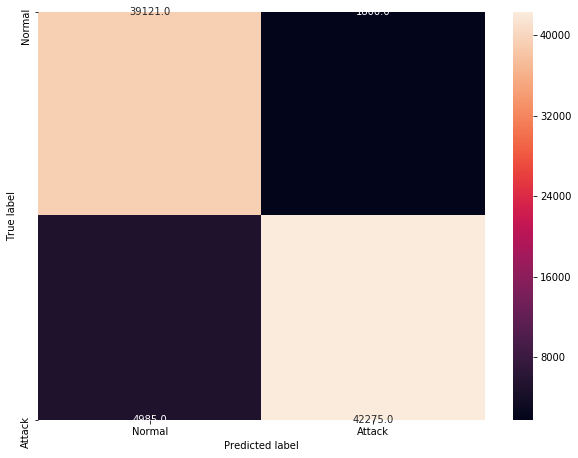

In [468]:
sns.heatmap(cm, annot=True,  fmt='.1f', xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### DOING THE FINAL PREDICTION AT 0.49 AS CUT-OFF

In [469]:
train['predicted'] = train['pred_prob'].apply(lambda x: 1 if x > 0.49 else 0)
test['predicted'] = test['pred_prob'].apply(lambda x: 1 if x > 0.49 else 0)

train = train.dropna().reset_index(drop = True)
test = test.dropna().reset_index(drop = True)

In [470]:
pd.crosstab(train['activity'], train['predicted'])

predicted,0,1
activity,,
0,42275,4985
1,1800,39121


In [471]:
pd.crosstab(test['activity'], test['predicted'])

predicted,0,1
activity,,
0,17852,2231
1,738,16971


## CHECK ACCURACY

In [472]:
print("The overall accuracy score for the Train Data is : ", accuracy_score(train.activity, train.predicted))
print("The overall accuracy score for the Test Data  is : ", accuracy_score(test.activity, test.predicted))

The overall accuracy score for the Train Data is :  0.9230559871174062
The overall accuracy score for the Test Data  is :  0.921438399661304


In [473]:
print('ROC AUC score of train data:', roc_auc_score(train.activity, train.predicted))
print('ROC AUC score of test data:', roc_auc_score(test.activity, test.predicted))

ROC AUC score of train data: 0.9252662417680556
ROC AUC score of test data: 0.9236186470227836


### Hence we built a network intrusion detection system to detect anamolies and attacks in the network.

#### APPLYING THIS MODEL ON NEW TESTING DATASET TO PREDICT WHETHER THE ACTIVITY IS NORMAL OR ATTACK

In [474]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [475]:
# Splitting continous and categorical valriables to perform some specific functions on them.
# and so to have better clarity of the data

test_df_conti_vars = test_df.loc[:, (test_df.dtypes == 'float64') | (test_df.dtypes == 'int64') | (test_df.dtypes == 'float32') | (test_df.dtypes == 'int32')]
test_df_cat_vars = test_df.loc[:, test_df.dtypes == 'object']


In [476]:
# Creating a UDF to convert categorical varibles to dummy variables for model building

def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df


# Creating dummy variables
for c_feature in ['protocol_type', 'flag']:
    test_df_cat_vars[c_feature] = test_df_cat_vars[c_feature].astype('category')
    test_df_cat_vars = create_dummies(test_df_cat_vars, c_feature)

In [477]:
test_df_cat_vars = test_df_cat_vars[test_df_cat_vars.columns.difference(['service', 'attack'])]

In [478]:
test_final = pd.concat([test_df_conti_vars, test_df_cat_vars], axis = 1)

In [479]:
test_final['prob'] = lm.predict(test_final)
test_final.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp,prob
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.508278
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.508278
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0.000790
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.931934
4,1,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.999933


In [480]:
test_final['activity'] = test_final['prob'].apply(lambda x: 1 if x > 0.49 else 0)

In [481]:
test_final.activity.value_counts()

1    12440
0    10104
Name: activity, dtype: int64

<CENTER> <H1> THEREFORE, OUR NETWORK INTRUSION DETECTION SYSTEM DETECTED 12440 ANOMALIES AND ATTACKS IN THE NETWORK.

___

## MULTINOMIAL CLASSIFICATION

In [482]:
# Bringing back the 'attack' variable for classification

df1['attack'] = train_df['attack']

In [483]:
df1.head()

,src_bytes,dst_bytes,hot,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,last_flag,activity,flag_RSTO,flag_RSTR,flag_S1,protocol_type_udp,attack
0,491,0.0,0,0.00,0.00,0.03,0.17,20,0,0,0,0,0,normal
1,146,0.0,0,0.15,0.00,0.60,0.88,15,0,0,0,0,1,normal
2,0,0.0,0,0.07,0.00,0.05,0.00,19,1,0,0,0,0,neptune
3,232,8153.0,0,0.00,0.00,0.00,0.03,21,0,0,0,0,0,normal
4,199,420.0,0,0.00,0.09,0.00,0.00,21,0,0,0,0,0,normal


In [484]:
# df1.attack.unique()  # All type of attacks

In [485]:
# Mapping of attack class with attack type

w = np.where
n = df1['attack']

df1['attack_class'] = w((n.isin(['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']) == True), 'DoS', 
                       w((n.isin(['ipsweep', 'nmap', 'portsweep']) == True), 'Probe',
                        w((n.isin(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy']) == True), 'R2L',
                         w((n.isin(['buffer_overflow', 'loadmodule', 'rootkit', 'perl']) == True), 'U2R', 'Normal'))))


In [486]:
df1.attack_class.unique()

array(['Normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

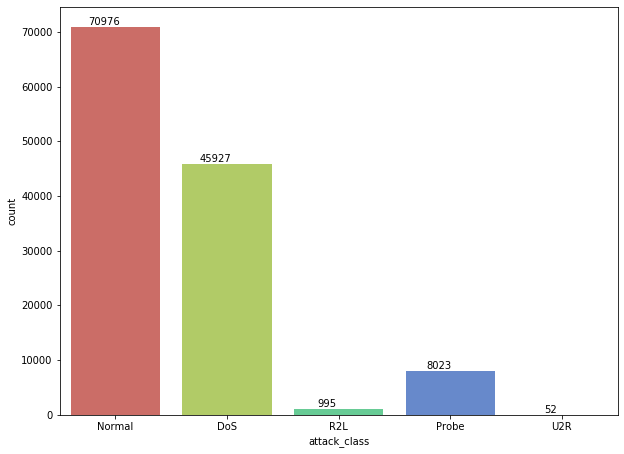

In [487]:
graph = sns.countplot(x = 'attack_class', data = df1, palette = 'hls')
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

Assigning numeric values to attack class for model building

Normal - 0 <br>
DoS - 1<br>
Probe - 2<br>
R2L - 3<br>
U2R - 4<br>

In [488]:
# Assigning numeric values to attack class for model building

w = np.where
n = df1['attack_class']

df1['attack_class_num'] = w((n == 'Normal'), 0, w((n == 'DoS'), 1, w((n == 'Probe'), 2, w((n == 'R2L'), 3, 
                            w((n == 'U2R'), 4, ''))))) 

In [489]:
df1.attack_class_num.unique()

array(['0', '1', '3', '2', '4'], dtype=object)

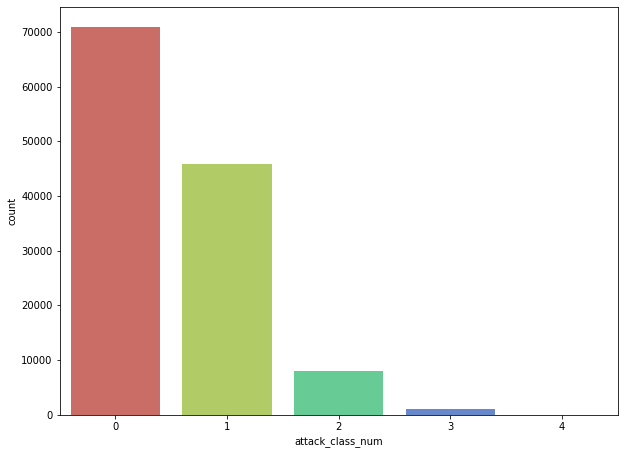

In [490]:
# Graphical representation of attack class
# Exploring the target data and visualizing it.

sns.countplot(x = 'attack_class_num', data = df1, palette = 'hls')
plt.show()

In [491]:
# Feature selection

feature_cols = df1.columns.difference(['activity', 'attack', 'attack_class', 'attack_class_num'])

In [492]:
feature_cols

Index(['diff_srv_rate', 'dst_bytes', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'flag_RSTO', 'flag_RSTR', 'flag_S1',
       'hot', 'last_flag', 'protocol_type_udp', 'src_bytes',
       'srv_diff_host_rate'],
      dtype='object')

In [493]:
X = df1[feature_cols]         # feature variables
y = df1['attack_class_num']   # Target variable

In [494]:
# Splitting 75% of the data to training set while 25% of the data to test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [495]:
# Instantiating the Logistic Regression model using default and using fit() function to train your model.

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [496]:
# Now that we have trained our algorithm, it’s time to make some predictions.

y_pred = logreg.predict(X_test)

In [497]:
# Model Evaluation using Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15500,  2074,   108,    11,     0],
       [  639, 10834,     8,     3,     0],
       [   97,   156,  1775,     0,     0],
       [   10,   148,     9,   107,     0],
       [    6,     3,     0,     6,     0]])

Text(69.0, 0.5, 'Actual label')

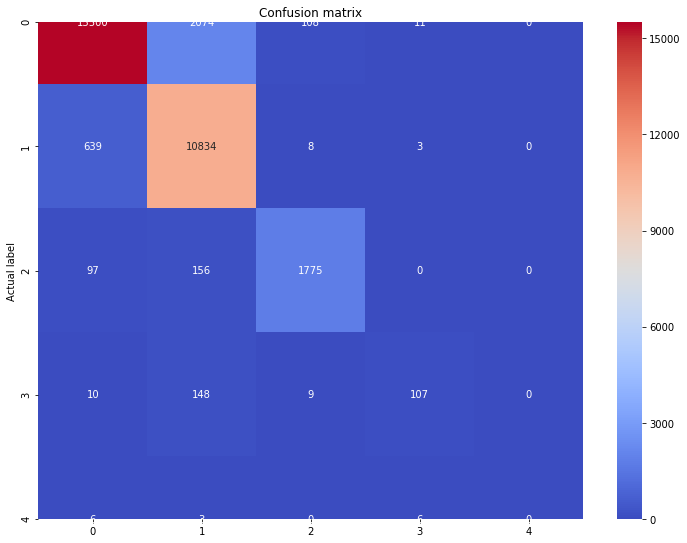

In [498]:
# Visualizing Confusion Matrix using Heatmap

class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')

In [499]:
# checking the accuracy of the model.

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8959166825427065


In [500]:
# checking how much area is under the ROC curve

from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.7906847583471345


### Hence we built a network intrusion detection system to detect anamolies and attacks in the network.

#### APPLYING THIS MODEL ON TESTING DATASET TO PREDICT WHETHER THE ACTIVITY IS NORMAL OR DOS OR PROBE OR R2L OR U2R

In [501]:
test_final = test_final[feature_cols]

In [502]:
# Now that we have trained our algorithm, it’s time to make some predictions.

test_final['y_pred'] = logreg.predict(test_final)

In [503]:
test_final.head()

,diff_srv_rate,dst_bytes,dst_host_diff_srv_rate,dst_host_same_src_port_rate,flag_RSTO,flag_RSTR,flag_S1,hot,last_flag,protocol_type_udp,src_bytes,srv_diff_host_rate,y_pred
0,0.06,0,0.06,0.00,0,0,0,0,21,0,0,0.00,1
1,0.06,0,0.06,0.00,0,0,0,0,21,0,0,0.00,1
2,0.00,0,0.04,0.61,0,0,0,0,21,0,12983,0.00,0
3,0.00,0,0.00,1.00,0,0,0,0,15,0,20,1.00,2
4,0.00,15,0.17,0.03,1,0,0,0,11,0,0,0.75,2


In [504]:
# Assigning orignal names to attack class

w = np.where
n = test_final['y_pred']

test_final['attack_class'] = w((n == '0'), 'Normal', w((n == '1'), 'DoS', w((n == '2'), 'Probe', w((n == '3'), 'R2L', w((n == '4'), 'U2R', '')))))


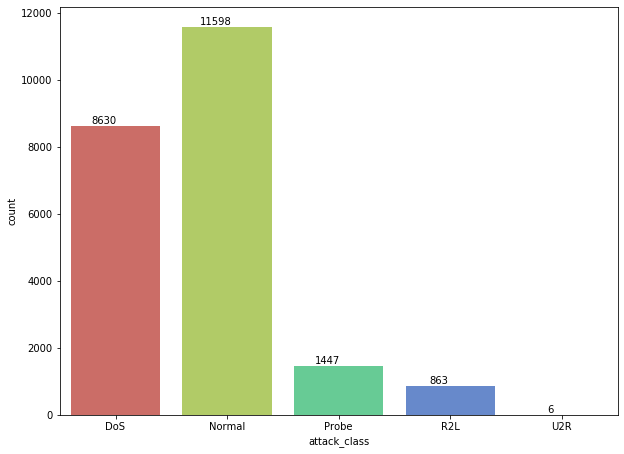

In [505]:
# Graphical representation of attack class
# Exploring the target data and visualizing it.

graph = sns.countplot(x = 'attack_class', data = test_final, palette = 'hls')
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [506]:
test_final.attack_class.value_counts()

Normal    11598
DoS        8630
Probe      1447
R2L         863
U2R           6
Name: attack_class, dtype: int64

In [507]:
values = test_final.attack_class.value_counts()
values

Normal    11598
DoS        8630
Probe      1447
R2L         863
U2R           6
Name: attack_class, dtype: int64

In [508]:
# Percentage of every Activity classs in the data

for i in range(0, 5):
    x = ((values[i]*100)/values.sum()).round(2)
    print(i, 'group is about', x, '% of the customer database')

0 group is about 51.45 % of the customer database
1 group is about 38.28 % of the customer database
2 group is about 6.42 % of the customer database
3 group is about 3.83 % of the customer database
4 group is about 0.03 % of the customer database


 <H4> THEREFORE, OUR NETWORK INTRUSION DETECTION SYSTEM DETECTED VARIOUS ACTIVITIES IN THE NETWORK :

- **11598 Normal Activity** which is **51.45%** of total activities in the network.<br><br>
- **8630 DoS Activity** which is **38.28%** of total activities in the network.<br><br>
- **1447 Probe Activity** which is **6.42%** of total activities in the network.<br><br>
- **863 R2L Activity** which is **3.83%** of total activities in the network.<br><br>
- **6 U2R Activity** which is **0.03%** of total activities in the network.

<center> <h1> END